# Task
- For this assignment, you will be revisiting your first project to predict supermarket sales. You will be applying everything you've learned this week to explain how your models made their predictions.

## Part 3 - Local Explanations
Continue working in your model explanation notebook from the previous core assignment. Add a new "Local Explanations" header at the bottom and continue your work:

- Select at least 2 example rows/outlets based on the insights gained from your previous core assignments this week.
- Explain why you selected the examples that you did.
  - If you're having trouble thinking of which type of examples to select, try selecting a store that had low sales ( one of the lowest values for your target) and one with high sales (the highest values for your target).
- For each example, produce :
  - a Lime Tabular explanation
    - Interpret what features most heavily influenced the predictions, according to LIME.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the lime explanation.
  - an Individual Force Plot
    - Interpret what features most heavily influenced the predictions, according to SHAP.
    - Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README). Note: you will need to take a screenshot to save the individual force plot.

## Update your README.
- Add your explanation for why you selected the individual examples that you visualized.
- For each example (need at least 2 examples)
  - A Lime tabular explanation
    - Your corresponding interpretation
  - A sharp force plot
    - Your corresponding interpretation.

# Imports

In [1]:
import pandas as pd
import numpy as np
import joblib
import shap
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from lime.lime_tabular import LimeTabularExplainer

import warnings
warnings.filterwarnings('ignore')

# Load JobLib File

In [2]:
loaded = joblib.load('Best_Models.joblib')
loaded.keys()

dict_keys(['X_train', 'y_train', 'X_test', 'y_test', 'preprocessor', 'LinearRegression', 'DecisionTreeRegressor'])

## Save as Separate Variables

In [3]:
X_train_df = loaded['X_train']
y_train = loaded['y_train']
X_test_df = loaded['X_test']
y_test = loaded['y_test']
preprocessor = loaded['preprocessor']
lin_reg = loaded['LinearRegression']
dec_tree = loaded['DecisionTreeRegressor']

# Using SHAP

## Create X_shap and y_shap variables

In [4]:
len(X_train_df)

6392

In [5]:
X_shap = shap.sample(X_train_df, nsamples = 6392, random_state = 42)
X_shap.head()

Outlet_Size  Outlet_Location_Type  Outlet_Type  \
4776          1.0                   2.0          2.0   
7510          1.0                   2.0          2.0   
5828          1.0                   0.0          1.0   
5327          0.0                   1.0          1.0   
4810          1.0                   1.0          1.0   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
4776                       1.0                       0.0   
7510                       0.0                       1.0   
5828                       0.0                       1.0   
5327                       1.0                       0.0   
4810                       1.0                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
4776                     0.0               0.0                  0.0   
7510                     0.0               0.0                  0.0   
5828                     0.0               0.0                  0.0   
5327                     1.0               0.0                  0.0   
4810                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  ...  Outlet_Establishment_Year_1997  \
4776               0.0              0.0  ...                             0.0   
7510               0.0              0.0  ...                             0.0   
5828               0.0              0.0  ...                             0.0   
5327               0.0              0.0  ...                             0.0   
4810               0.0              0.0  ...                             0.0   

      Outlet_Establishment_Year_1998  Outlet_Establishment_Year_1999  \
4776                             0.0                             0.0   
7510                             0.0                             0.0   
5828                             0.0                             1.0   
5327                             0.0                             0.0   
4810                             0.0                             0.0   

      Outlet_Establishment_Year_2002  Outlet_Establishment_Year_2004  \
4776                             0.0                             0.0   
7510                             0.0                             0.0   
5828                             0.0                             0.0   
5327                             0.0                             1.0   
4810                             1.0                             0.0   

      Outlet_Establishment_Year_2007  Outlet_Establishment_Year_2009  \
4776                             0.0                             1.0   
7510                             0.0                             1.0   
5828                             0.0                             0.0   
5327                             0.0                             0.0   
4810                             0.0                             0.0   

      Item_Weight  Item_Visibility  Item_MRP  
4776       16.350         0.029565  256.4646  
7510       15.250         0.000000  179.7660  
5828       12.350         0.158716  157.2946  
5327        7.975         0.014628   82.3250  
4810       19.350         0.016645  120.9098  

[5 rows x 43 columns]

In [6]:
## get the corresponding y-values
y_shap = y_train.loc[X_shap.index]
y_shap.head()

4776     515.3292
7510    3056.0220
5828    1577.9460
5327    1331.6000
4810    1687.1372
Name: Item_Outlet_Sales, dtype: float64

## Create a SHAP explainer 

In [7]:
explainer = shap.Explainer(dec_tree)
explainer

## Calculate SHAP Values

In [8]:
## Getting the shap values
shap_values = explainer(X_shap, y_shap)
type(shap_values)

shap._explanation.Explanation

In [9]:
shap_values.shape

(6392, 43)

In [10]:
shap_values[0]

.values =
array([-1.15325433e+01, -6.21734050e+01, -9.28112912e+02,  9.58910600e+00,
       -4.06899491e+00, -5.74462726e+00, -1.50925690e+00, -6.52853471e-01,
       -1.89713452e+00, -4.53169672e+00, -2.40789852e+00, -1.16347926e+01,
       -1.11261995e+00, -4.85068247e-01, -6.71013951e+02, -2.02802269e+00,
       -7.96104336e-01, -7.66110818e-01, -1.62191611e+01,  3.00047629e+00,
        3.41035733e+00,  3.85184486e-02, -2.24320720e+00, -3.35636720e+00,
       -1.26444349e+00,  9.04225525e-01, -8.42523539e+00,  5.12280632e-01,
       -2.28404252e+00,  1.33715608e+00, -2.02234861e+00, -2.14924936e+01,
       -3.99847618e+00, -1.85896251e-01,  1.49564696e-02, -4.25346772e+00,
       -2.92046074e+00, -4.51454916e+00, -7.87284962e+00, -3.25567800e+01,
       -4.35827887e+02, -1.97325685e+02,  7.43774108e+02])

.base_values =
array([2209.9793572])

.data =
array([1.0000000e+00, 2.0000000e+00, 2.0000000e+00, 1.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,


In [11]:
pd.DataFrame(shap_values.values, columns = X_shap.columns)

Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0      -11.532543            -62.173405  -928.112912   
1       61.540930              0.183206   -24.602718   
2       -5.953296             -5.860868    86.462860   
3       16.838337             30.139807   160.199685   
4       -1.022735              4.860706   200.285356   
...           ...                   ...          ...   
6387    -2.906547             -1.400159 -2532.289884   
6388     2.675520             15.593964   152.439858   
6389   -42.317077            293.821145   517.138142   
6390   -18.169120             -2.438301   159.482442   
6391   -44.410223             12.365257   147.786985   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                     9.589106                 -4.068995   
1                     6.054694                  0.120976   
2                    -3.853965                -10.854360   
3                    -3.552497                 -0.522581   
4                    -7.993236                  4.448477   
...                        ...                       ...   
6387                  0.923211                 -0.030328   
6388                 -4.807346                 -4.887084   
6389                 -9.426084                 -4.550848   
6390                 -1.895953                 52.711126   
6391                 -3.333031                 -3.426021   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                  -5.744627         -1.509257            -0.652853   
1                  -1.721280         -0.478475            -0.913961   
2                 -21.726191         -0.509767            -0.388503   
3                  37.491458          2.582882             2.612809   
4                  -1.879772          2.185726             0.530701   
...                      ...               ...                  ...   
6387               -1.527687         -1.013585             0.004260   
6388               -3.229529         -0.581701            -0.155228   
6389               -4.875254          1.375868            -0.154805   
6390               -3.275367         -0.343657            -0.207239   
6391               -5.929581         -2.061492            -0.386597   

      Item_Type_Canned  Item_Type_Dairy  ...  Outlet_Establishment_Year_1997  \
0            -1.897135        -4.531697  ...                       -0.185896   
1            29.695960        -2.536933  ...                        0.200423   
2            -1.428124         1.868467  ...                       -0.189599   
3            12.890044         0.523073  ...                       -0.665204   
4            -1.360258         5.111898  ...                        0.089354   
...                ...              ...  ...                             ...   
6387          1.829718         0.020955  ...                       -2.974506   
6388         15.487548         1.952532  ...                       -1.599875   
6389          0.702309         6.390759  ...                       -0.706395   
6390         -3.080097         2.154174  ...                       -1.482916   
6391          1.134585         0.584357  ...                       68.450993   

      Outlet_Establishment_Year_1998  Outlet_Establishment_Year_1999  \
0                           0.014956                       -4.253468   
1                           0.014554                       -6.666640   
2                           0.022390                       31.715423   
3                           0.011551                       -1.385454   
4                           0.016380                       19.493515   
...                              ...                             ...   
6387                       -0.048157                       -3.159795   
6388                        0.024205                       -0.277326   
6389                        0.024194                       12.328152   
6390                        0.015297                       -1.671075   
6391  

## Summary Bar Plot

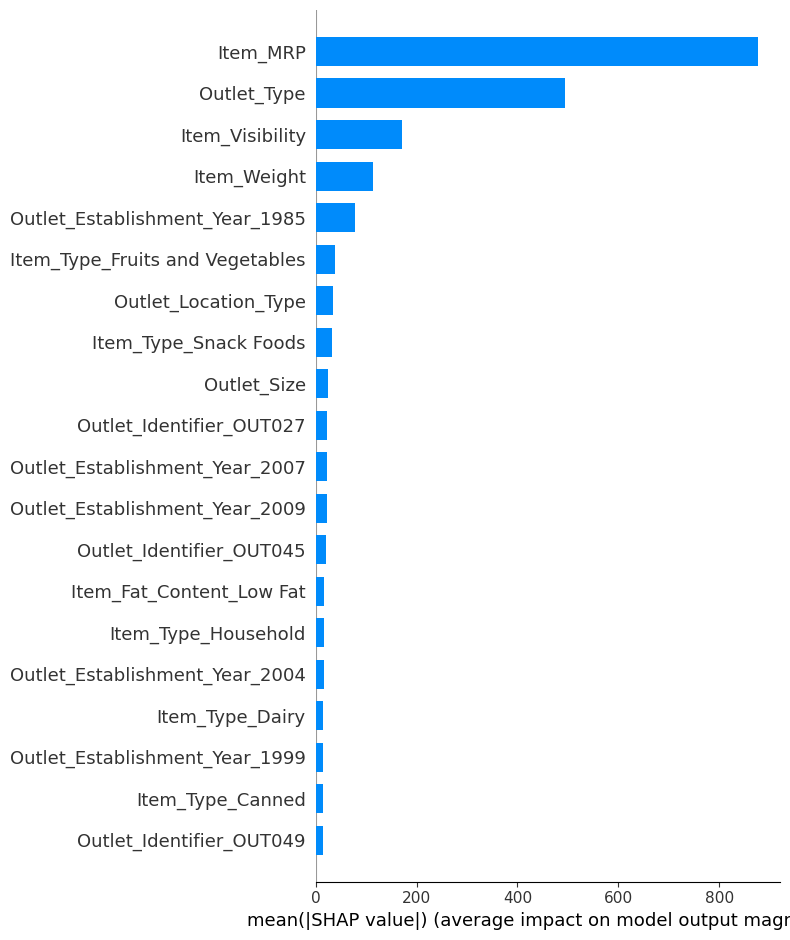

In [12]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap,  plot_type = 'bar')
ax.set_title('Decision Tree SHAP Bar Plot');

## Summary Dot Plot

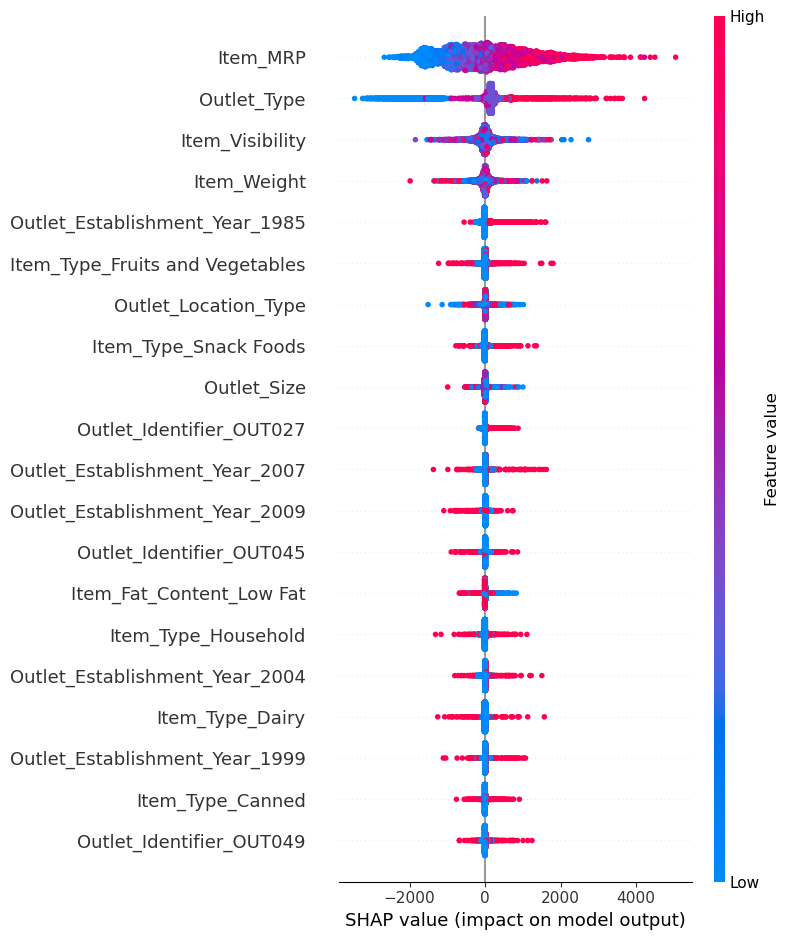

In [13]:
fig, ax = plt.subplots()
shap.summary_plot(shap_values, X_shap)
ax.set_title('Decision Tree SHAP Dot Plot');

# Local Explanations

For my two rows to check, I want to pick the stores that had the lowest and highest sales. I can look at those relative to the target and analyze the features that had the most impact on the model. 

In [14]:
# Sort the Indicies for both SHAP dataframes
X_shap = X_shap.sort_index()
y_shap = y_shap.sort_index()

# Reset the index for easier reference
X_shap_local = X_shap.reset_index(drop=True)
y_shap_local = y_shap.reset_index(drop=True)

In [15]:
X_shap_local

Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0             1.0                   2.0          2.0   
1             1.0                   0.0          1.0   
2             1.0                   2.0          0.0   
3             2.0                   2.0          1.0   
4             1.0                   2.0          2.0   
...           ...                   ...          ...   
6387          1.0                   2.0          2.0   
6388          0.0                   0.0          1.0   
6389          2.0                   2.0          1.0   
6390          0.0                   1.0          1.0   
6391          0.0                   0.0          1.0   

      Item_Fat_Content_Low Fat  Item_Fat_Content_Regular  \
0                          0.0                       1.0   
1                          1.0                       0.0   
2                          0.0                       1.0   
3                          1.0                       0.0   
4                          0.0                       1.0   
...                        ...                       ...   
6387                       1.0                       0.0   
6388                       0.0                       1.0   
6389                       1.0                       0.0   
6390                       1.0                       0.0   
6391                       1.0                       0.0   

      Item_Type_Baking Goods  Item_Type_Breads  Item_Type_Breakfast  \
0                        0.0               0.0                  0.0   
1                        0.0               0.0                  0.0   
2                        0.0               0.0                  0.0   
3                        0.0               0.0                  0.0   
4                        1.0               0.0                  0.0   
...                      ...               ...                  ...   
6387                     1.0               0.0                  0.0   
6388                     0.0               0.0                  0.0   
6389                     0.0               0.0                  0.0   
6390                     0.0               0.0                  0.0   
6391                     0.0               0.0                  0.0   

      Item_Type_Canned  Item_Type_Dairy  ...  Outlet_Establishment_Year_1997  \
0                  0.0              0.0  ...                             0.0   
1                  0.0              0.0  ...                             0.0   
2                  0.0              0.0  ...                             0.0   
3                  0.0              0.0  ...                             0.0   
4                  0.0              0.0  ...                             0.0   
...                ...              ...  ...                             ...   
6387               0.0              0.0  ...                             0.0   
6388               0.0              0.0  ...                             1.0   
6389               0.0              0.0  ...                             0.0   
6390               0.0              0.0  ...                             0.0   
6391               0.0              0.0  ...                             1.0   

      Outlet_Establishment_Year_1998  Outlet_Establishment_Year_1999  \
0                                0.0                             0.0   
1                                0.0                             1.0   
2                                1.0                             0.0   
3                                0.0                             0.0   
4                                0.0                             0.0   
...                              ...                             ...   
6387                             0.0                             0.0   
6388                             0.0                             0.0   
6389                             0.0                             0.0   
6390                             0.0                             0.0   
6391  

In [16]:
y_shap_local

0        443.4228
1       2097.2700
2        732.3800
3        994.7052
4        556.6088
          ...    
6387    1571.2880
6388    3608.6360
6389    2778.3834
6390    1193.1136
6391     765.6700
Name: Item_Outlet_Sales, Length: 6392, dtype: float64

In [17]:
y_shap_local.max()

13086.9648

In [18]:
y_shap_local.min()

33.29

## Lime Tabular Explanation

In [19]:
lime_explainer =LimeTabularExplainer(training_data = X_shap_local.values, 
                                     feature_names = X_shap_local.columns,
                                     mode = 'regression')
lime_explainer

### Minimum Sales

In [20]:
# Find the index of a min value for target
row = y_shap_local.min()

index = y_shap_local.index[y_shap_local == row].tolist()
print(f'Index: {index}')

Index: [661]


In [21]:
exp = lime_explainer.explain_instance(X_shap_local.loc[661], dec_tree.predict)
exp.show_in_notebook()

As we can see above, this was the minimum sales value from the target.
There were several features that led to this minimum value:
- Item_MRP = 32.89
- Outlet_Type = 0
- Outlet_Establishment_Year_1985 = 0
- Item_Type_Meat = 0
- Item_Type_Canned = 0
- Outlet_Identifier_OUT049 = 0
- Outlet_Identifier_OUT027 = 0
- Item_Type_Breakfast = 0


The most impactful features that are working to help increase the minimum sales are:
- Item_Type_Others = 0
- Item_Type_Breads = 0

### Maximum Sales

In [22]:
# Find the index of a min value for target
row = y_shap_local.max()

index = y_shap_local.index[y_shap_local == row].tolist()
print(f'Index: {index}')

Index: [5401]


In [23]:
exp = lime_explainer.explain_instance(X_shap_local.loc[5401], dec_tree.predict)
exp.show_in_notebook()

As we can see above, this was the maximum sales value from the target.
There were several features that led to this maximum value:
- Item_MRP = 235
- Outlet_Type = 3
- Outlet_Establishment_Year_1985 = 1
- Item_Type_Seafood = 1
- Item_Type_Household = 1
- Outlet_Identifier_OUT027 = 1.00

The most impactful features that are working against the maximum sales are:
- Item_Type_Others = 0
- Item_Type_Breakfast = 0
- Item_Type_Hard Drinks = 0
- Item_Type_Health and Hygiene = 0

## Force Plots

### Minimum Sales

In [24]:
# Find the index of a min value for target
row = y_shap_local.min()

index = y_shap_local.index[y_shap_local == row].tolist()
print(f'Index: {index}')

Index: [661]


In [25]:
i = 661
single_row_X = X_shap_local.iloc[i]
single_row_y = y_shap_local.iloc[i]
single_shap_vals = shap_values[i]
single_row_X.head(10)

Outlet_Size                 1.0
Outlet_Location_Type        2.0
Outlet_Type                 0.0
Item_Fat_Content_Low Fat    1.0
Item_Fat_Content_Regular    0.0
Item_Type_Baking Goods      0.0
Item_Type_Breads            0.0
Item_Type_Breakfast         0.0
Item_Type_Canned            0.0
Item_Type_Dairy             0.0
Name: 661, dtype: float64

In [26]:
## true class of selected row
single_row_y

33.29

In [27]:
## Individual forceplot (with the complex shap vals)
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values = single_shap_vals.values,
               features = single_row_X)

In the visual above, we can see:

- A number line at the top of the visual (with the base value labeled).
 - Here the base value is 2,210.
- A bold value at the intersection of the red and blue is the final SHAP value for the observation.
 - Here the SHAP value is 75.90
- The red and blue segments with arrows towards the middle are "pushing" against each other.
 - Visually, the contributions of the blue features are greater than the red which means a greater "push" towards lower revenue.
 - The wider the segment is for the feature, the greater its contribution to the prediction is.
- As you can see, `Item_MRP` is the most important feature for this output. Further, the actual value for each feature is listed. For the sales, this `Item_MRP` = 32.89 Rupees.

### Maximum Sales

In [28]:
# Find the index of a min value for target
row = y_shap_local.max()

index = y_shap_local.index[y_shap_local == row].tolist()
print(f'Index: {index}')

Index: [5401]


In [29]:
i = 5401
single_row_X = X_shap.iloc[i]
single_row_y = y_shap.iloc[i]
single_shap_vals = shap_values[i]
single_row_X.head()

Outlet_Size                 1.0
Outlet_Location_Type        2.0
Outlet_Type                 3.0
Item_Fat_Content_Low Fat    1.0
Item_Fat_Content_Regular    0.0
Name: 7188, dtype: float64

In [30]:
## true class of selected row
single_row_y

13086.9648

In [31]:
## Individual forceplot (with the complex shap vals)
shap.initjs()
shap.force_plot(explainer.expected_value[0],shap_values = single_shap_vals.values,
               features = single_row_X)

In the visual above, we can see:

- A number line at the top of the visual (with the base value labeled).
 - Here the base value is 2,210.
- A bold value at the intersection of the red and blue is the final SHAP value for the observation.
 - Here the SHAP value is 2,554.01
- The red and blue segments with arrows towards the middle are "pushing" against each other.
 - Visually, the contributions of the red features are greater than the blue which means a greater "push" towards higher revenue.
 - The wider the segment is for the feature, the greater its contribution to the prediction is.
- As you can see, `Item_MRP` is the most important feature for this output. Further, the actual value for each feature is listed. For the sales, this `Item_MRP` = 235 Rupees.
